In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
np.random.seed(seed=233423)

In [2]:
Data = pd.read_csv("Seshat Data.csv")

In [3]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [4]:
np.median(Data["SPC1"])

0.356081775

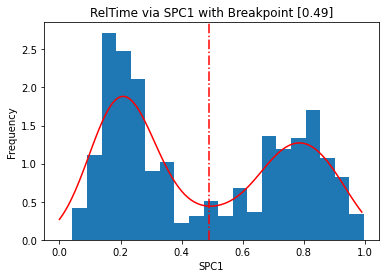

In [5]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


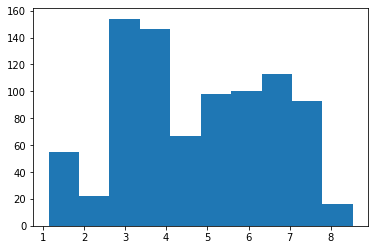

PolTerr


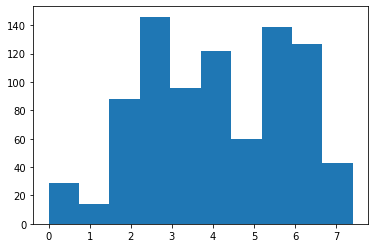

CapPop


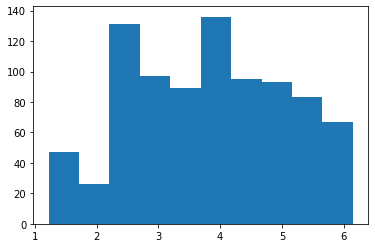

levels


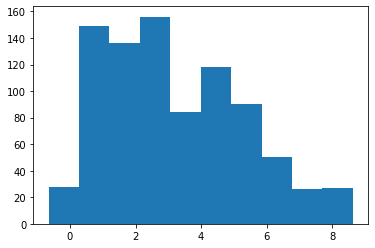

government


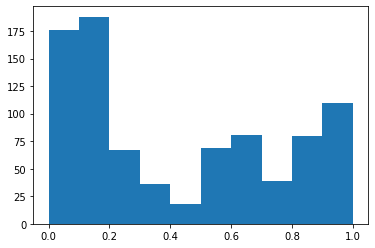

infrastr


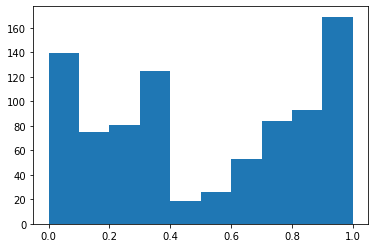

writing


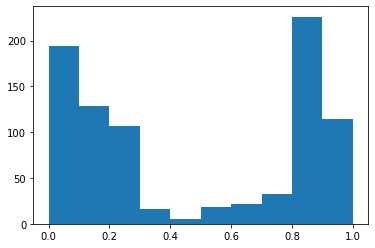

texts


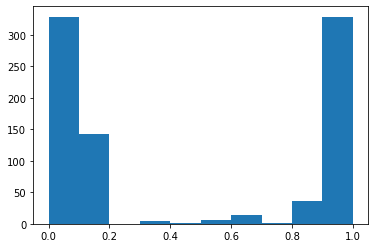

money


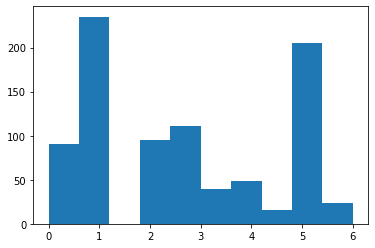

SPC1


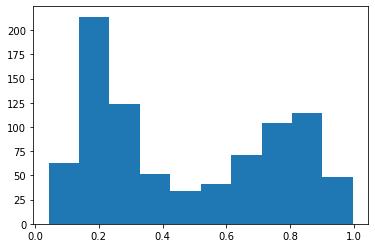

In [6]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [7]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [8]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [9]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Orkhon Valley large enough? [ True]
Is Cahokia large enough? [False]
Is Chuuk Islands large enough? [False]
Is Central Java large enough? [ True]
Is Sogdiana large enough? [ True]
Is Finger Lakes large enough? [False]
Is Iceland large enough? [ True]
Is Middle Yellow River Valley large enough? [ True]
Is Yemeni Coastal Plain large enough? [ True]
Is Cuzco large enough? [ True]
Is Garo Hills large enough? [False]
Is Susiana large enough? [ True]
Is Konya Plain large enough? [ True]
Is Big Island Hawaii large enough? [False]
Is Valley of Oaxaca large enough? [False]
Is Latium large enough? [ True]
Is Niger Inland Delta large enough? [ True]
Is Kansai large enough? [ True]
Is Ghanaian Coast large enough? [ True]
Is Cambodian Basin large enough? [ True]
Is Southern China Hills large enough? [False]
Is Upper Egypt large enough? [ True]
Is Kapuasi Basin large enough? [False]
Is Kachi Plain large enough? [ True]
Is Oro PNG large enough? [False]
Is North Colombia large enough? [False]
Is

In [10]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [11]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Orkhon Valley 500
     Time      SPC1
524 -1900  0.315541
525 -1800  0.315541
526 -1700  0.315541
527 -1600  0.315541
528 -1500  0.315541
529 -1400  0.315541
530 -1300  0.315541
531 -1200  0.315541
532 -1100  0.315541
533 -1000  0.315541
534  -900  0.327782
535  -800  0.327782
536  -700  0.459248
537  -600  0.459248
538  -500  0.450334
539  -400  0.430392
540  -300  0.430392
541  -200  0.430236
542  -100  0.430236
543     0  0.520649
544   100  0.600909
545   200  0.596967
546   300  0.644542
547   400  0.644542
548   500  0.782909
549   600  0.782909
550   700  0.302733
551   800  0.909591
552   900  0.698625
553  1000  0.698625
554  1100  0.645079
555  1200  0.718817
556  1300  0.992245
557  1400  0.996386
 ________________________ 
Ghanaian Coast 1800
     Time      SPC1
122  -200  0.419548
123  -100  0.419548
124     0  0.623384
 ________________________ 
Susiana -3700
     Time      SPC1
662 -4100  0.129737
663 -4000  0.129737
664 -3900  0.129737
665 -3800  0.129737
666 -3700  0.1

C:\Users\Tobias\AppData\Local\Temp/ipykernel_17516/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_17516/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_17516/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [12]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("TimeZero.csv")
DF_Tzero.transpose()

NGA,Orkhon Valley,Ghanaian Coast,Susiana,Niger Inland Delta,Central Java,Cambodian Basin,Sogdiana,Konya Plain,Upper Egypt,Iceland,Middle Yellow River Valley,Yemeni Coastal Plain,Cuzco,Paris Basin,Kansai,Latium,Kachi Plain,Deccan
T0,500,1800,-3700,1000,800,300,-500,-2000,-3100,1300,-1800,400,1400,-200,400,-700,-2500,-300


In [13]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
524,Orkhon Valley,MnXngnE,-1900,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.100000,1.0,0.315541,0
525,Orkhon Valley,MnXngnE,-1800,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.100000,1.0,0.315541,0
526,Orkhon Valley,MnXngnE,-1700,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.100000,1.0,0.315541,0
527,Orkhon Valley,MnXngnE,-1600,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.100000,1.0,0.315541,0
528,Orkhon Valley,MnXngnE,-1500,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.100000,1.0,0.315541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Deccan,InKampi,1600,5.803963,4.406782,3.276168,3.956549,0.912500,0.766667,0.766667,0.962500,5.0,0.689394,1
115,Deccan,InVijay,1700,7.397940,5.549201,5.000000,4.776099,0.900000,0.977778,0.800000,0.971429,5.0,0.823462,1
116,Deccan,InVijay,1800,7.397940,5.549201,5.345320,4.776099,0.900000,0.977778,0.800000,0.971429,5.0,0.832824,1
117,Deccan,InVijay,1900,7.397940,5.549201,5.461400,4.776099,0.900000,0.977778,0.800000,0.971429,5.0,0.832812,1


## Comparison

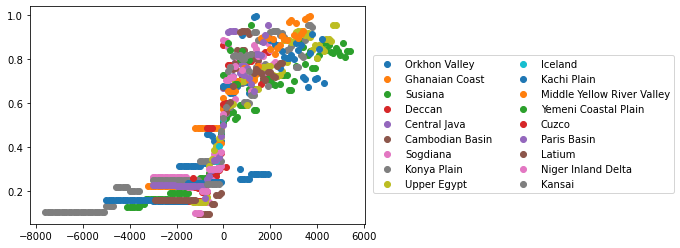

In [14]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

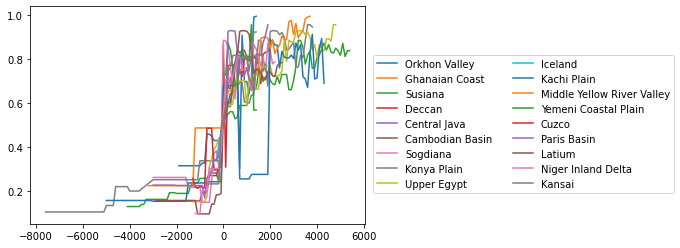

In [15]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [16]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

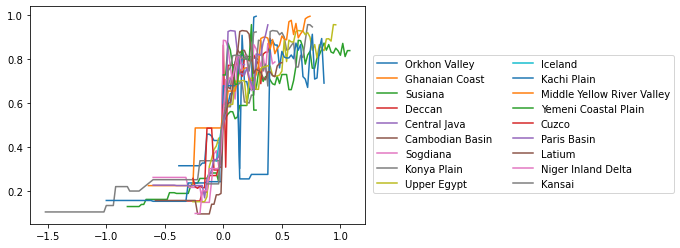

In [17]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [18]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [19]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641013e-01  1.93784865e-01  1.93749266e+01 -1.54321375e-02]


In [20]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.591641013248896 0.19378486462315173 19.374926564898487 -0.015432137478176688
-1.52 1.2600000000000025


In [21]:
print(p0)


[ 5.91641013e-01  1.93784865e-01  1.93749266e+01 -1.54321375e-02]


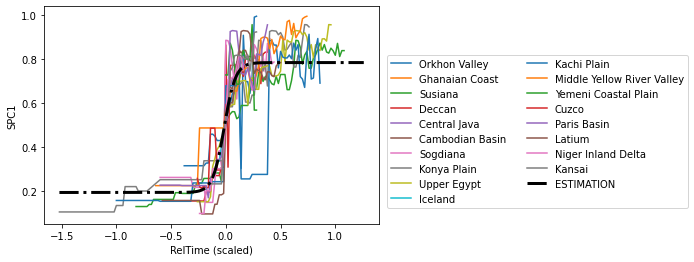

In [22]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

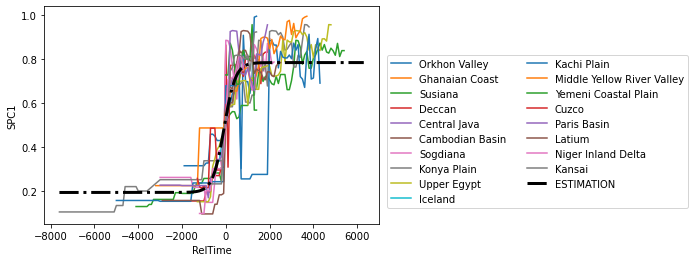

In [23]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals

In [24]:
y_est = f(X,a_, b_, c_, d_)

In [25]:
RMSE = (np.sum((y_est-y)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583113969


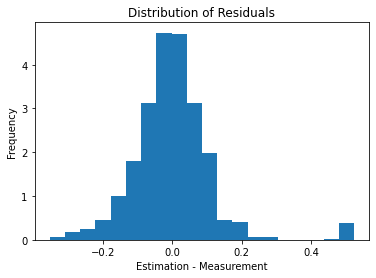

In [26]:
plt.hist(y_est-y,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [27]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [28]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.6247672872188488 0.18317897453106863 10.934253886998825 -0.01596724577904141
-----------------
0.6995919893473508 0.13793488924918693 6.280954141543706 0.010078478556903941
-----------------
0.632780280853244 0.1571924008496855 7.978212922656728 -0.012215147373637231
-----------------
0.5856427927021894 0.20416095479237192 29.432657551607246 -0.010583772469111475
-----------------
0.6111945798915569 0.19558782869930447 15.415590130590113 -0.015779634773582473
-----------------
0.6005715912339155 0.19572502690903146 20.254430135070393 -0.014987456188872551
-----------------
0.5912466280839772 0.18555466503723111 32.00410725004385 -0.014506589034889727
-----------------
0.6346146673176922 0.18511545805083876 12.411607459312785 -0.008863133144551803
-----------------
0.6046144753184661 0.18283023123996034 34.17761932940173 -0.007967965531037902
-----------------
0.6700978382740745 0.1533324126613482 7.806319169309305 -0.003159963985434791
-----------------
0.5828264037527163 0.207449540

0.5531656655772192 0.20394299180642161 34.979147985666366 -0.013362072101562233
-----------------
0.6438987223554645 0.16237884893445667 9.128567570304636 -0.00706245844041472
-----------------
0.5937698229716635 0.1886351807529856 19.984414711247354 -0.011551505200248176
-----------------
0.584544132658193 0.2071553388374108 33.46859498377407 -0.011196034012958196
-----------------
0.5576569087725769 0.21922045936085022 31.970585059340596 -0.014224803870521548
-----------------
0.6020830267994824 0.19809621463420785 22.026323533612675 -0.012218287397166041
-----------------
0.5908593092744461 0.20180537356990857 14.556351757454726 -0.021898973270924098
-----------------
0.5107177637125165 0.22178720888951584 47.48707444794433 -0.017135632968830403
-----------------
0.6502897179515306 0.15476778944503847 7.663243114760189 -0.004124167260255305
-----------------
0.630918892272379 0.1745841439170541 12.107479852500866 -0.009256279332085827
-----------------
0.650236779862472 0.1851751358

0.5923779431497646 0.21752762515568932 22.97558686503453 -0.008439355157925755
-----------------
0.5413389102312166 0.19811765733982645 29.785053789577812 -0.018323968089476055
-----------------
0.6017060221089965 0.18181353914283546 15.356374071528103 -0.013773194418412908
-----------------
0.554361807728627 0.19787712896661577 29.964400801997993 -0.017675670603654846
-----------------
0.6138588331074486 0.19674707793775728 15.983278890264573 -0.023896443043481295
-----------------
0.5291635158684145 0.19428731972927624 60.11399661023433 -0.016382344832868493
-----------------
0.6816647989094433 0.16801396108034436 7.835571369905077 -0.010575899417024734
-----------------
0.6078935778205673 0.2027765035521455 23.953739912292427 -0.015609225117620255
-----------------
0.6801267920893843 0.18344089689335633 10.516019723855235 -0.0011287333166642394
-----------------
0.651360077145697 0.17206116263346244 11.419248709087087 -0.010268203005980137
-----------------
0.6132496418206331 0.1769

0.5953501046323222 0.1921751977460623 19.07851277980819 -0.015595295516066822
-----------------
0.5801626071046271 0.18091586845120408 21.53665932267546 -0.01747776826031217
-----------------
0.5692568495413897 0.21601699199246574 36.97609261963573 -0.014567851263084595
-----------------
0.6187020563856918 0.17966920404609657 16.88522629153282 -0.017121541524191642
-----------------
0.5379466881875129 0.2171701937638318 50.00389770925315 -0.011646349700842657
-----------------
0.5841700228741105 0.20025909783193147 22.968697258712883 -0.014367412047533997
-----------------
0.6479604995318734 0.18752368665160643 12.513066266993299 -0.010185537411162664
-----------------
0.6746582443328871 0.15218898605661585 7.299891481164993 0.0032504268297480045
-----------------
0.6633026956288067 0.18409964035829784 9.854763723087395 -0.004929858306076547
-----------------
0.5570648701975833 0.19026644293954775 33.67827800857327 -0.017581477245619148
-----------------
0.5957413426118924 0.1623067561

0.5715324066839517 0.19423042619424086 20.169960545495034 -0.0207051049690237
-----------------
0.5748935580527922 0.19787568454202112 23.06503274442965 -0.014580454975696334
-----------------
0.6124689093942745 0.17624870409990323 14.465348537334929 -0.006934610477723523
-----------------
0.591320596986518 0.185465084933337 27.61642315613768 -0.01472149817139144
-----------------
0.6516990671667018 0.22203811407377916 11.656162478035132 0.005742827115841064
-----------------
0.6105823979321449 0.1869336145358606 14.976858240771117 -0.013574473976699912
-----------------
0.5990255635438353 0.18556350666521054 27.054124716951222 -0.012574494240499971
-----------------
0.613428933449407 0.17544219739840236 18.902844889488495 -0.006581469464340816
-----------------
0.555849328047313 0.18624779272015002 31.30750505327215 -0.016459770995830004
-----------------
0.542641315503149 0.20306641179724425 29.654286854871113 -0.016755904764467193
-----------------
0.5800634448548218 0.2036584218536

0.6141798884690002 0.185070851543794 12.033986533562977 -0.012781482800072942
-----------------
0.6416202944470134 0.17456083016136587 9.348572784594 -0.007065536603827891
-----------------
0.5841991650399772 0.19685755753676107 17.18016906852321 -0.01974343859410799
-----------------
0.5193011195602429 0.20972735974582624 168.69936771489682 -0.013872555477341853
-----------------
0.6184270430436057 0.1851910239321926 17.552715541225073 -0.011947873333324541
-----------------
0.5895595991068958 0.19305754106102746 26.17384267479468 -0.01580900480017034
-----------------
0.594090303518492 0.19755465873675643 21.317775580161907 -0.015741860974090704
-----------------
0.5791750160533209 0.19385262491761499 25.134879492761677 -0.020943223754592375
-----------------
0.5496268407725321 0.192282426651482 18.856829321576843 -0.02795547067754573
-----------------
0.5946922849389393 0.19719813245133425 17.667688272710866 -0.015454183678704369
-----------------
0.6267069062940024 0.17898176025579

0.6608584858925951 0.1569328508494669 8.915099908925704 0.006726293871334571
-----------------
0.6006071579488161 0.1955037340008895 23.463097451803304 -0.010431580412215084
-----------------
0.5858069688242038 0.19588954305465342 15.021777457320797 -0.02041273071423056
-----------------
0.5616284815710337 0.1847230060274588 36.87664529483766 -0.01346341090772438
-----------------
0.5806667995144267 0.19682260280609026 27.83668666954828 -0.00831226062271292
-----------------
0.5686021896242439 0.2054053560566543 21.634793492218787 -0.02221370799248403
-----------------
0.5765301957856318 0.20487974786424365 15.156723359350536 -0.01708534128851886
-----------------
0.6067871825572517 0.1896811018764936 15.72808325419526 -0.012807607845172294
-----------------
0.607228039317262 0.2012294715321435 16.613704715206392 -0.009483347651024989
-----------------
0.6000279888224616 0.18846008270468423 18.39269367470408 -0.012962631230371549
-----------------
0.5935588142521048 0.19501659228759857

0.6284513259061045 0.20015274810290778 17.108147839031613 -0.0040557759767775895
-----------------
0.5955872826411552 0.17660348910742377 17.793818652350414 -0.01581402225000404
-----------------
0.6453871903717683 0.1724382047935215 14.091302377492038 -0.012934763444621456
-----------------
0.581267725501686 0.21344939609939226 19.071830508281167 -0.013476761065800756
-----------------
0.6401611040620778 0.1698815964949134 19.44812166079796 -0.012693071176232978
-----------------
0.6391034898724123 0.19484269480510194 13.249953340720007 -0.01278287050281402
-----------------
0.5949525401383374 0.20724576333921557 20.79174189669009 -0.003839248784456953
-----------------
0.6179677113327647 0.1949807280623049 23.346995577438722 -0.015357501014413749
-----------------
0.5813418641453717 0.18958463504297016 26.959083362566943 -0.014781646029906304
-----------------
0.6698406479716552 0.15453382560166995 7.657548836466883 -0.005860094194827982
-----------------
0.6563159321428268 0.1602235

0.6801140622676424 0.15216421646604544 6.4454326126013095 -0.0031914985474774714
-----------------
0.5702981976534135 0.19862544583439154 21.0614367522386 -0.015155567892950323
-----------------
0.5815898090079723 0.18115808006142664 16.516237636774978 -0.02178478334434527
-----------------
0.5723534110037353 0.197107674455744 41.0118155512925 -0.01468692594496802
-----------------
0.6030899399981046 0.19355392712154476 25.688789841929765 -0.01852782395161989
-----------------
0.5582288971280506 0.19136943252686517 30.050656374219155 -0.017329253403376165
-----------------
0.6011634410153671 0.2023781800483186 16.38422392392413 -0.00995706937696208
-----------------
0.6177252395753685 0.21930214609892518 13.814399640633907 0.0005313814483620862
-----------------
0.6125007268999649 0.18948599482673512 22.16910643704591 -0.0082815280105053
-----------------
0.5497412287536084 0.1997388431658761 27.22229558158526 -0.022338053482936247
-----------------
0.5983766433091627 0.209896199121605

0.5613804758802183 0.19414461332932695 35.469808113172384 -0.01633189816454254
-----------------
0.5875194427816268 0.18987596487693986 18.559114375518696 -0.018735602639280355
-----------------
0.6319593468600233 0.17669790985977915 14.592191676957707 -0.001686819865440614
-----------------
0.6073686547935696 0.21850173494938055 17.43687972764133 -0.010380173353206642
-----------------
0.5912631556606385 0.18466976674301147 16.61718388476136 -0.019689291879970542
-----------------
0.5899783714061481 0.20226464050143794 24.9405737379093 -0.010620523061393314
-----------------
0.5583561122461012 0.21210365948025917 30.316953303780707 -0.017367229452194252
-----------------
0.5311080126272181 0.2225580178982528 49.50478050848183 -0.018472113995720917
-----------------
0.5825810298057915 0.19110805476140777 21.1400088395003 -0.02106264289320163
-----------------
0.558236738742905 0.1881310237000775 27.696884611976436 -0.016603627999416712
-----------------
0.5704887026323272 0.20795663174

0.6014821206985459 0.19927871466725833 21.956099502611107 -0.009577270952864203
-----------------
0.6350490006781362 0.1524842481536378 8.07733106584951 -0.005875623601108563
-----------------
0.6265105768584398 0.18681345638080554 12.833920280881456 -0.01017257840152977
-----------------
0.5990664814480849 0.18620756677590755 16.007075507858318 -0.010454449265304006
-----------------
0.5524836614572597 0.2181229636008837 28.010576870798236 -0.015241436437784986
-----------------
0.6217238079244091 0.17918191655421517 12.267603359048355 -0.015139671599869804
-----------------
0.5368170698577215 0.21033458236408908 29.667668726494533 -0.015261522376826521
-----------------
0.634046966146082 0.19209602616702662 14.936946461376117 -0.0053312704966500925
-----------------
0.6149339537963152 0.1827580675648353 14.508465527599084 -0.013316947739971994
-----------------
0.5714931019255015 0.2090288278875718 27.258988670270842 -0.015338697945147287
-----------------
0.6071927558214542 0.213517

0.6065299297604847 0.18972862503943355 23.93701110495414 -0.00854016942018775
-----------------
0.5913577340783318 0.18790489741852065 27.440260345732952 -0.016853874947300847
-----------------
0.618592048101539 0.19402162311652468 22.7381898177236 -0.0140816388018935
-----------------
0.6005167162285314 0.20500356720528357 15.801403998669095 -0.011631547728342566
-----------------
0.5662524711544641 0.1833277744380817 26.33221555435771 -0.01144937303255032
-----------------
0.7175906831795414 0.1663440457958551 7.639589709412914 0.0034502112100555176
-----------------
0.5194659614329167 0.18762725936434152 52.892816249155835 -0.019025951853063994
-----------------
0.6014010875927687 0.20384550239426083 33.60518715302081 -0.009354080862021923
-----------------
0.6265215876126706 0.18117875856199572 11.023954525913071 -0.017631154860655363
-----------------
0.6209255742150169 0.17637022448028167 14.16777012464881 -0.02112467310150083
-----------------
0.5327177973647602 0.20890434330620

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [29]:
print(negCcount)

0


In [30]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

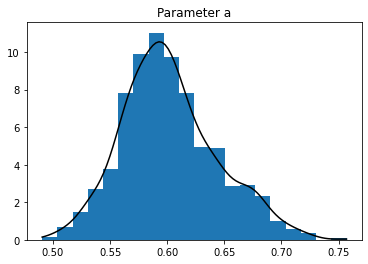

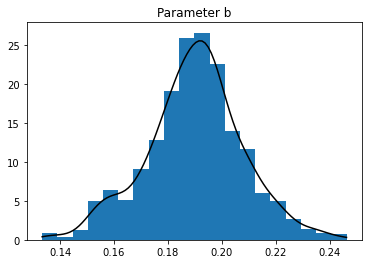

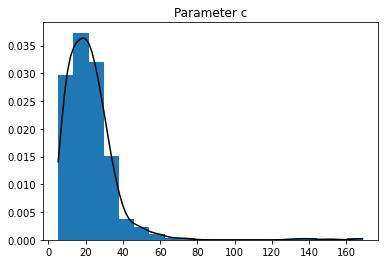

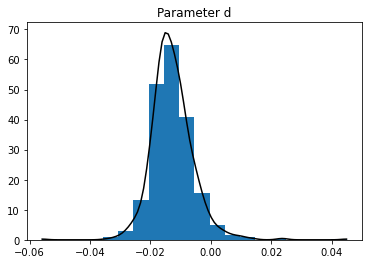

In [31]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [32]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.1899705084848504 0.01787439152610986
0.7920757159736674 0.03254093529853983
0.20784490001096026 0.7595347806751276
0.19378486462328115 0.7854258775134328


In [33]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

In [34]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_17516/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [35]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1755.0 years.


In [36]:
# 1748
# 1804

## Bootstrapping the Time Interval

Now we can repeat this task, but 

1) check if we actually need the parameter d

2) Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

##### Testing d

In [37]:
print(np.quantile(Params["d"],0.975))


0.0028543456119701958


In [38]:
from statsmodels.stats.weightstats import ztest

ztest(Params["d"], x2=None, value=0, alternative="smaller")
# almost surely not 0, so we keep d

(-57.82954541410986, 0.0)

##### Bootstrap for the Time Interval

In [39]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [40]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.6247672872188488 0.18317897453106863 10.934253886998825 -0.01596724577904141     fjac: array([[-1.]])
     fun: array([2.10942375e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.7909039e-10])
       r: array([-0.25905753])
  status: 1
 success: True
       x: array([-0.30786424])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.92779167e-14])
       r: array([-0.48832607])
  status: 1
 success: True
       x: array([0.21056748])
-----------------
0.6995919893473508 0.13793488924918693 6.280954141543706 0.010078478556903941     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.36172193e-13])
       r: array([-0.39522231])
  status: 1
 success: True
       x: array([-0.33986931])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.14864809e-11])
       r: array([-

C:\Users\Tobias\AppData\Local\Temp/ipykernel_17516/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0.5819334774087483 0.1945075590820611 36.56580622823154 -0.014180983251955883     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.18688392e-12])
       r: array([-0.47651303])
  status: 1
 success: True
       x: array([-0.11680699])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-3.75255382e-13])
       r: array([-0.60023136])
  status: 1
 success: True
       x: array([0.08178819])
-----------------
0.5758828071068613 0.19836391303680115 30.89103524176508 -0.01741126422003954     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.18915433e-11])
       r: array([-0.28805518])
  status: 1
 success: True
       x: array([-0.14981263])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.41471296e-12])
       r: array([-0.44285

0.6017233063663444 0.18383975428383575 25.02068040341894 -0.005870838644813498     fjac: array([[-1.]])
     fun: array([-5.38458167e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-4.60837313e-10])
       r: array([-0.576657])
  status: 1
 success: True
       x: array([-0.13299839])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.70192765e-12])
       r: array([-0.62307455])
  status: 1
 success: True
       x: array([0.11788257])
-----------------
0.6612512348681915 0.17752015980397895 9.032436241697555 -0.00990394788818432     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.53328478e-14])
       r: array([-0.26134505])
  status: 1
 success: True
       x: array([-0.34594014])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.38828171e-10])
  

0.6152470896320148 0.20149815240883054 16.845245486571493 -0.006623993206905488     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.09314813e-14])
       r: array([-0.10580965])
  status: 1
 success: True
       x: array([-0.27754389])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.05231404e-14])
       r: array([-0.87410971])
  status: 1
 success: True
       x: array([0.12858851])
-----------------
0.5888992668054809 0.19339555602881928 23.04978069597115 -0.00699771673333693     fjac: array([[-1.]])
     fun: array([-4.16333634e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([8.55402971e-11])
       r: array([-0.32488395])
  status: 1
 success: True
       x: array([-0.16677207])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.52571355e-14])
       r: array([-0.5043

0.5918059126340162 0.1750437033981734 14.261204994395094 -0.026868729864384273     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.85049762e-14])
       r: array([-0.44185736])
  status: 1
 success: True
       x: array([-0.22570837])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.77919918e-13])
       r: array([-0.103029])
  status: 1
 success: True
       x: array([0.28031688])
-----------------
0.5872945407638753 0.19566657495790896 25.51163642202805 -0.010797961083586062     fjac: array([[-1.]])
     fun: array([-7.77156117e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.04918491e-10])
       r: array([-0.30424425])
  status: 1
 success: True
       x: array([-0.16190212])     fjac: array([[-1.]])
     fun: array([-7.77156117e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.58358104e-10])
       r: arr

       x: array([-0.2084165])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.19444471e-12])
       r: array([-0.42794262])
  status: 1
 success: True
       x: array([0.14980288])
-----------------
0.6093088224868817 0.17558964781844558 16.556845239082065 -0.007874072228084892     fjac: array([[-1.]])
     fun: array([-1.38777878e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.51973467e-11])
       r: array([-0.50577551])
  status: 1
 success: True
       x: array([-0.1820772])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.59872116e-14])
       r: array([-0.40246183])
  status: 1
 success: True
       x: array([0.18156349])
-----------------
0.6298437162300373 0.18604141945657499 17.527218428184078 -0.003258704804516173     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
  

0.5704664687872255 0.1964265045092386 33.34092396990169 -0.011486014202294026     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-6.51007026e-13])
       r: array([-0.37307969])
  status: 1
 success: True
       x: array([-0.12818973])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.76734191e-12])
       r: array([-0.24216477])
  status: 1
 success: True
       x: array([0.11861409])
-----------------
0.6031091977373275 0.20195807154199316 23.96939066049201 -0.0087871944635216     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-5.6627758e-12])
       r: array([-0.1397262])
  status: 1
 success: True
       x: array([-0.20151517])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-7.51398943e-13])
   

0.570547562843369 0.19837639150941908 32.52546496647981 -0.009408069071816303     fjac: array([[-1.]])
     fun: array([-6.10622664e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([9.11941078e-11])
       r: array([-0.30285875])
  status: 1
 success: True
       x: array([-0.13490636])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.0569435e-11])
       r: array([-0.30036247])
  status: 1
 success: True
       x: array([0.11635327])
-----------------
0.6237099055971302 0.18113549074770535 26.13608464624744 -0.011372989382124983     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.82909243e-14])
       r: array([-0.66818519])
  status: 1
 success: True
       x: array([-0.13024703])     fjac: array([[-1.]])
     fun: array([1.11022302e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.32

0.6017060221089965 0.18181353914283546 15.356374071528103 -0.013773194418412908     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-5.4006799e-12])
       r: array([-0.38245342])
  status: 1
 success: True
       x: array([-0.21539896])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.73985304e-13])
       r: array([-0.35363764])
  status: 1
 success: True
       x: array([0.19341582])
-----------------
0.6138588331074486 0.19674707793775728 15.983278890264573 -0.023896443043481295     fjac: array([[-1.]])
     fun: array([2.83106871e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.4157551e-10])
       r: array([-0.1741748])
  status: 1
 success: True
       x: array([-0.27383089])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.66422431e-13])
       r: array

0.6117591774049745 0.19285388388262628 17.145464755420505 -0.01574734698421426     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.23925348e-12])
       r: array([-0.25072977])
  status: 1
 success: True
       x: array([-0.23061919])     fjac: array([[-1.]])
     fun: array([2.55351296e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.24674296e-10])
       r: array([-0.71593255])
  status: 1
 success: True
       x: array([0.13189495])
-----------------
0.5939416851494246 0.19825417999840242 18.882768220894732 -0.016548317862999307     fjac: array([[-1.]])
     fun: array([4.71844785e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.18943238e-11])
       r: array([-0.17817618])
  status: 1
 success: True
       x: array([-0.2341915])     fjac: array([[-1.]])
     fun: array([6.66133815e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.74575021e-10])
    

0.6875607545019982 0.16034972447315887 7.830748539967662 0.003143883621364581     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.66501879e-12])
       r: array([-0.34623139])
  status: 1
 success: True
       x: array([-0.32900093])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.98649994e-14])
       r: array([-0.60309542])
  status: 1
 success: True
       x: array([0.24756157])
-----------------
0.6746279153374546 0.178395978244631 8.136969655805986 -0.0010664997144080345     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-6.65578703e-13])
       r: array([-0.22916489])
  status: 1
 success: True
       x: array([-0.38043015])     fjac: array([[-1.]])
     fun: array([-4.4408921e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.6048185e-10])
       r: array([-

0.7124797310081253 0.18970849298527429 8.303273357229806 -0.00014227204914571848     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-6.23112673e-14])
       r: array([-0.1467582])
  status: 1
 success: True
       x: array([-0.43913121])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.718481e-11])
       r: array([-0.94733102])
  status: 1
 success: True
       x: array([0.16664898])
-----------------
0.5953501046323222 0.1921751977460623 19.07851277980819 -0.015595295516066822     fjac: array([[-1.]])
     fun: array([1.41553436e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([1.44282752e-10])
       r: array([-0.29108323])
  status: 1
 success: True
       x: array([-0.2048526])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-3.33653105e-11])
       r: array([

0.6637025369074234 0.18346382336988998 9.697622384075114 -0.0061130996010543654     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.27290409e-13])
       r: array([-0.22775294])
  status: 1
 success: True
       x: array([-0.34295856])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.02671213e-12])
       r: array([-0.73761287])
  status: 1
 success: True
       x: array([0.18806743])
-----------------
0.6482644712509043 0.1791666276388799 13.666744770145916 -0.01467363553198965     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.75280901e-11])
       r: array([-0.37460035])
  status: 1
 success: True
       x: array([-0.23951957])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-4.30588898e-12])
       r: arra

-----------------
0.5931452792399119 0.1881858477993427 24.440585738341678 -0.014449411707385366     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([7.16399162e-13])
       r: array([-0.46455399])
  status: 1
 success: True
       x: array([-0.15246558])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.25086657e-13])
       r: array([-0.51313964])
  status: 1
 success: True
       x: array([0.11919132])
-----------------
0.6057553443432857 0.20252686463877928 13.991245539411766 -0.007393578218376104     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.90659727e-13])
       r: array([-0.07375274])
  status: 1
 success: True
       x: array([-0.34521585])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.15161222e-13])
       

0.6183217539075974 0.16856082328070654 12.261698431637969 -0.013831060640716916     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.76306755e-13])
       r: array([-0.45108617])
  status: 1
 success: True
       x: array([-0.23325811])     fjac: array([[-1.]])
     fun: array([-3.77475828e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.11466972e-10])
       r: array([-0.32050199])
  status: 1
 success: True
       x: array([0.23679784])
-----------------
0.6086878381263735 0.17718588632168225 16.73850191098884 -0.020314197838207503     fjac: array([[-1.]])
     fun: array([-1.44328993e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.57635663e-10])
       r: array([-0.48733455])
  status: 1
 success: True
       x: array([-0.19575983])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.01585407e-12])
       r: arr

       x: array([0.20011862])
-----------------
0.591320596986518 0.185465084933337 27.61642315613768 -0.01472149817139144     fjac: array([[-1.]])
     fun: array([-1.66533454e-16])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([5.45549439e-11])
       r: array([-0.59466065])
  status: 1
 success: True
       x: array([-0.13188428])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-9.59776703e-12])
       r: array([-0.46251022])
  status: 1
 success: True
       x: array([0.11219162])
-----------------
0.6105823979321449 0.1869336145358606 14.976858240771117 -0.013574473976699912     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.61465563e-11])
       r: array([-0.30245983])
  status: 1
 success: True
       x: array([-0.23653685])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
   

0.5552345885946885 0.20582311594623812 21.944230238157665 -0.017663641268026952     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.55871452e-12])
       r: array([-0.04420507])
  status: 1
 success: True
       x: array([-0.27339202])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([3.66373598e-15])
       r: array([-0.03332775])
  status: 1
 success: True
       x: array([0.25101801])
-----------------
0.6382576038569474 0.19575563423156528 13.895189745932589 -0.00869770608240012     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.918288e-14])
       r: array([-0.16480088])
  status: 1
 success: True
       x: array([-0.29277453])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.83422199e-13])
       r: array([-0.91413

       x: array([0.20970627])
-----------------
0.5710770919044321 0.19555112977328667 30.18246899218036 -0.015776507011214858     fjac: array([[-1.]])
     fun: array([-1.52655666e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.62387853e-10])
       r: array([-0.36306507])
  status: 1
 success: True
       x: array([-0.14222969])     fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-7.05757675e-11])
       r: array([-0.21143985])
  status: 1
 success: True
       x: array([0.1292035])
-----------------
0.5836308407394734 0.19268011190059767 25.738634828844095 -0.015383593394885348     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.70811151e-13])
       r: array([-0.38017908])
  status: 1
 success: True
       x: array([-0.15618226])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9

0.5811919525387572 0.202226173170562 21.81413667736752 -0.01762667301693533     fjac: array([[-1.]])
     fun: array([1.94289029e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.49572316e-11])
       r: array([-0.12138344])
  status: 1
 success: True
       x: array([-0.2298405])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.12079235e-11])
       r: array([-0.49958552])
  status: 1
 success: True
       x: array([0.12677225])
-----------------
0.6141798884690002 0.185070851543794 12.033986533562977 -0.012781482800072942     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.50782165e-11])
       r: array([-0.26390058])
  status: 1
 success: True
       x: array([-0.28342171])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.3398618e-13])
       r

0.6719540318341869 0.13335723790524712 6.970559879859862 0.0040975981472497845     fjac: array([[-1.]])
     fun: array([5.82867088e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.9389812e-10])
       r: array([-0.46166534])
  status: 1
 success: True
       x: array([-0.29459641])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.59539049e-12])
       r: array([-0.29735015])
  status: 1
 success: True
       x: array([0.37937066])
-----------------
0.6211861443184141 0.16999993308949554 15.28305982539267 -0.002551994308619888     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.34308406e-11])
       r: array([-0.54315015])
  status: 1
 success: True
       x: array([-0.18152625])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([6.91668944e-14])
    

0.6024550852532775 0.19286728881200335 31.05414910231165 -0.012216555589208894     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([1.85458038e-11])
       r: array([-0.45355459])
  status: 1
 success: True
       x: array([-0.13037408])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([3.90497634e-11])
       r: array([-1.04533356])
  status: 1
 success: True
       x: array([0.07673038])
-----------------
0.6498263643084614 0.17285893632309987 9.541699861337255 -0.02178899944062243     fjac: array([[-1.]])
     fun: array([7.21644966e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.62867608e-10])
       r: array([-0.31585413])
  status: 1
 success: True
       x: array([-0.32219834])     fjac: array([[-1.]])
     fun: array([-3.66373598e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.469456e-10])
    

       x: array([-0.25577775])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.21804822e-14])
       r: array([-0.77396669])
  status: 1
 success: True
       x: array([0.13935849])
-----------------
0.6005250278197494 0.19884644303302854 27.48988168117237 -0.009761780838349991     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.29788411e-13])
       r: array([-0.24365994])
  status: 1
 success: True
       x: array([-0.16202339])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.71040959e-12])
       r: array([-1.02246022])
  status: 1
 success: True
       x: array([0.08643277])
-----------------
0.5940434717113645 0.18862195505923957 21.594262117873722 -0.01573657671679159     fjac: array([[-1.]])
     fun: array([3.60822483e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: arr

0.6672331951137973 0.16065311172871014 9.37124868820618 -0.0038096424663792185     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.13995488e-14])
       r: array([-0.41096701])
  status: 1
 success: True
       x: array([-0.27864669])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([7.76045894e-14])
       r: array([-0.57492218])
  status: 1
 success: True
       x: array([0.22779238])
-----------------
0.5815553161855463 0.18236792309213262 27.14165671179124 -0.016045607401274718     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.00197628e-14])
       r: array([-0.66119443])
  status: 1
 success: True
       x: array([-0.12963978])     fjac: array([[-1.]])
     fun: array([-1.11022302e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.59678995e-11])
       r: array([-0.118212

0.5914593001485144 0.1996919871247606 29.128821764249167 -0.008132860517135474     fjac: array([[-1.]])
     fun: array([-4.71844785e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.68639055e-10])
       r: array([-0.23421527])
  status: 1
 success: True
       x: array([-0.15473465])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-5.70787861e-12])
       r: array([-0.87172151])
  status: 1
 success: True
       x: array([0.0905315])
-----------------
0.680542639496272 0.1529810541198112 6.944244079841433 0.002948022045045366     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.77819475e-12])
       r: array([-0.3502737])
  status: 1
 success: True
       x: array([-0.34755558])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.3734347e-11])
      

0.68866483745282 0.1748818390822213 9.955111155554434 -0.004737504555959591     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.28856942e-11])
       r: array([-0.31244446])
  status: 1
 success: True
       x: array([-0.30511773])     fjac: array([[-1.]])
     fun: array([-1.66533454e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.87470952e-10])
       r: array([-0.87906484])
  status: 1
 success: True
       x: array([0.16869232])
-----------------
0.5703711498613069 0.19965549311838135 32.27093307068808 -0.017025620720591998     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([2.6811886e-14])
       r: array([-0.26048528])
  status: 1
 success: True
       x: array([-0.14807184])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.98649994e-14])
    

0.6410001199263992 0.1585876072882117 7.626273777989502 -0.008967026602287837     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-8.76843043e-12])
       r: array([-0.34678322])
  status: 1
 success: True
       x: array([-0.33494728])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([8.14681655e-13])
       r: array([-0.28636842])
  status: 1
 success: True
       x: array([0.34616116])
-----------------
0.6284513259061045 0.20015274810290778 17.108147839031613 -0.0040557759767775895     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.80757354e-11])
       r: array([-0.12998811])
  status: 1
 success: True
       x: array([-0.26070206])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.9023674e-11])
       r: arra

0.594604595472297 0.18901847761023435 29.810136037125073 -0.01375818675298719     fjac: array([[-1.]])
     fun: array([-3.1918912e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-3.04570036e-10])
       r: array([-0.54344318])
  status: 1
 success: True
       x: array([-0.12849973])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.27708963e-11])
       r: array([-0.68898384])
  status: 1
 success: True
       x: array([0.09240758])
-----------------
0.6721659402002262 0.1559707728147433 7.498278940182343 -0.0016904427736688548     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.14818743e-12])
       r: array([-0.35894848])
  status: 1
 success: True
       x: array([-0.3326157])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.18685062e-11])
  

0.6197887544616623 0.1675585857823249 11.068062920094633 -0.005298219994893071     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.86730142e-12])
       r: array([-0.4169088])
  status: 1
 success: True
       x: array([-0.24618572])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.42232925e-13])
       r: array([-0.29401751])
  status: 1
 success: True
       x: array([0.2709903])
-----------------
0.5921131375107349 0.18289827598321573 20.943874518187293 -0.0176826835408977     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.81084053e-14])
       r: array([-0.50046611])
  status: 1
 success: True
       x: array([-0.16683916])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.10462808e-15])
       r: array([-0.31566828

-----------------
0.6109195915570163 0.18474592588106092 17.365041867890092 -0.014203686633005594     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.54810625e-12])
       r: array([-0.38594826])
  status: 1
 success: True
       x: array([-0.20059158])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([9.76263514e-12])
       r: array([-0.59030633])
  status: 1
 success: True
       x: array([0.14513131])
-----------------
0.611155773988474 0.18701344052637983 13.494043825805512 -0.019279662527311107     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.86778371e-12])
       r: array([-0.27151932])
  status: 1
 success: True
       x: array([-0.2671081])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.09382536e-11])
       r:

0.7246058484562384 0.15322165086116527 5.962578538128645 0.00290112719241043     fjac: array([[-1.]])
     fun: array([2.96984659e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.71660294e-10])
       r: array([-0.30114528])
  status: 1
 success: True
       x: array([-0.41751969])     fjac: array([[-1.]])
     fun: array([-2.22044605e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.20010035e-10])
       r: array([-0.5901862])
  status: 1
 success: True
       x: array([0.27698294])
-----------------
0.6180153531237252 0.18556915666690876 14.01443673355967 -0.01735042751463261     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.86795024e-14])
       r: array([-0.30092972])
  status: 1
 success: True
       x: array([-0.25184471])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.65423231e-13])
      

       x: array([0.13246896])
-----------------
0.5989009370399261 0.19327867605878893 22.285515585339088 -0.012874663483327265     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.25878213e-12])
       r: array([-0.31672042])
  status: 1
 success: True
       x: array([-0.17853242])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.04336548e-12])
       r: array([-0.68785184])
  status: 1
 success: True
       x: array([0.11516186])
-----------------
0.5623803026513173 0.19823134083694338 28.594060684339127 -0.023757518224716292     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.0658141e-14])
       r: array([-0.27019161])
  status: 1
 success: True
       x: array([-0.16545693])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([3.56592

0.5829693716820106 0.1814668046380053 30.365514370295667 -0.01318821831012839     fjac: array([[-1.]])
     fun: array([1.91513472e-15])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.90745761e-10])
       r: array([-0.76473661])
  status: 1
 success: True
       x: array([-0.11360796])     fjac: array([[-1.]])
     fun: array([-4.4408921e-16])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([1.05939257e-10])
       r: array([-0.14758278])
  status: 1
 success: True
       x: array([0.14390352])
-----------------
0.5914390193015798 0.18884764465084009 29.496453133149913 -0.012300249298876331     fjac: array([[-1.]])
     fun: array([-1.27675648e-15])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-1.7505461e-10])
       r: array([-0.54234891])
  status: 1
 success: True
       x: array([-0.12775876])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.78506124e-13])
 

0.5899783714061481 0.20226464050143794 24.9405737379093 -0.010620523061393314     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.94209102e-14])
       r: array([-0.13785851])
  status: 1
 success: True
       x: array([-0.19711772])     fjac: array([[-1.]])
     fun: array([5.32907052e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.57155877e-10])
       r: array([-0.77054371])
  status: 1
 success: True
       x: array([0.10306665])
-----------------
0.5825810298057915 0.19110805476140777 21.1400088395003 -0.02106264289320163     fjac: array([[-1.]])
     fun: array([-1.94289029e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.99448538e-11])
       r: array([-0.34365357])
  status: 1
 success: True
       x: array([-0.18760496])     fjac: array([[-1.]])
     fun: array([-1.66533454e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.01897832e-10])
     

0.6384253247167563 0.16422647673816668 10.175009090741504 -0.015423619771321345     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.82076576e-14])
       r: array([-0.41349539])
  status: 1
 success: True
       x: array([-0.27220543])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.23832064e-11])
       r: array([-0.40908718])
  status: 1
 success: True
       x: array([0.24257729])
-----------------
0.6454898993553825 0.1710361453291912 11.65052241007125 -0.004315535566071565     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.52938773e-11])
       r: array([-0.40438718])
  status: 1
 success: True
       x: array([-0.24512524])     fjac: array([[-1.]])
     fun: array([-1.77635684e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.38535089e-10])
       r: array([-0.6053576

0.5926767600405194 0.1972223063584661 23.518559650715783 -0.010151076937106224     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.27665109e-12])
       r: array([-0.24535025])
  status: 1
 success: True
       x: array([-0.18038175])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.91811012e-11])
       r: array([-0.67753706])
  status: 1
 success: True
       x: array([0.11395476])
-----------------
0.5875780946711089 0.20084220604241468 25.42306294494713 -0.01523954893896551     fjac: array([[-1.]])
     fun: array([-1.72084569e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.44186135e-10])
       r: array([-0.17591031])
  status: 1
 success: True
       x: array([-0.18900794])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.94733119e-13])
       r: arra

0.6265105768584398 0.18681345638080554 12.833920280881456 -0.01017257840152977     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.14742676e-12])
       r: array([-0.26085515])
  status: 1
 success: True
       x: array([-0.2719789])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.02771133e-12])
       r: array([-0.6310589])
  status: 1
 success: True
       x: array([0.17413008])
-----------------
0.5990664814480849 0.18620756677590755 16.007075507858318 -0.010454449265304006     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-8.636869e-12])
       r: array([-0.33384108])
  status: 1
 success: True
       x: array([-0.21562407])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.98729921e-14])
       r: array([-0.39430813])
  status: 1


0.6002822340145108 0.19371869878658138 24.580043178658112 -0.016065275220131542     fjac: array([[-1.]])
     fun: array([-4.08006962e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([3.41067091e-10])
       r: array([-0.33905565])
  status: 1
 success: True
       x: array([-0.16763355])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.13020704e-12])
       r: array([-0.79853719])
  status: 1
 success: True
       x: array([0.09777876])
-----------------
0.5705852777589258 0.19610498404377213 29.578539452449313 -0.015081065402843402     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([7.79321052e-13])
       r: array([-0.34010473])
  status: 1
 success: True
       x: array([-0.14567839])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.52033941e-12

0.6830816765811137 0.16309769273130179 8.139389671233138 -0.00459219039348373     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.76191847e-11])
       r: array([-0.34035644])
  status: 1
 success: True
       x: array([-0.33113183])     fjac: array([[-1.]])
     fun: array([-4.6629367e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([7.34120431e-10])
       r: array([-0.61578353])
  status: 1
 success: True
       x: array([0.23242303])
-----------------
0.6520413169311715 0.17828466489784986 9.830945900717403 -0.0038144131013156195     fjac: array([[-1.]])
     fun: array([4.16333634e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.09430853e-10])
       r: array([-0.27743157])
  status: 1
 success: True
       x: array([-0.31378288])     fjac: array([[-1.]])
     fun: array([-2.33146835e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.390807

0.5571194783054999 0.20402452230618381 30.872265760455576 -0.01329680182226768     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.15025783e-14])
       r: array([-0.11713492])
  status: 1
 success: True
       x: array([-0.17446247])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.52559085e-11])
       r: array([-0.04953724])
  status: 1
 success: True
       x: array([0.17600377])
-----------------
0.6165746252980567 0.1953342628432588 18.889152831273382 -0.013655665474951294     fjac: array([[-1.]])
     fun: array([3.3029135e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-2.98940678e-10])
       r: array([-0.23152293])
  status: 1
 success: True
       x: array([-0.21891108])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.95399252e-13])
   

0.5955392227928106 0.18287681277342216 19.886805433659298 -0.011890333383932927     fjac: array([[-1.]])
     fun: array([5.82867088e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.2642884e-10])
       r: array([-0.47571595])
  status: 1
 success: True
       x: array([-0.16923282])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.98903133e-13])
       r: array([-0.36358326])
  status: 1
 success: True
       x: array([0.16003671])
-----------------
0.5898776315152078 0.17200312979149887 17.46495792545601 -0.020827581545099057     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.47937218e-14])
       r: array([-0.58793991])
  status: 1
 success: True
       x: array([-0.17760525])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([6.11288797e-13])
    

In [41]:
print(Successes)
print(Params2.round(2))

727
       a     b      c     d    T1    T2
0   0.62  0.18  10.93 -0.02 -0.31  0.21
0   0.70  0.14   6.28  0.01 -0.34  0.34
0   0.63  0.16   7.98 -0.01 -0.32  0.36
0   0.59  0.20  29.43 -0.01 -0.18  0.09
0   0.61  0.20  15.42 -0.02 -0.27  0.15
..   ...   ...    ...   ...   ...   ...
0   0.59  0.18  17.82 -0.02 -0.20  0.20
0   0.63  0.19  14.11 -0.01 -0.26  0.15
0   0.61  0.21  18.16 -0.01 -0.31  0.12
0   0.59  0.19  17.16 -0.03 -0.24  0.16
0   0.64  0.19  12.04 -0.01 -0.32  0.16

[727 rows x 6 columns]


In [42]:
np.mean(Params2["T2"]-Params2["T1"]), np.std(Params2["T2"]-Params2["T1"])

(0.4087983565467373, 0.12790615051218515)

In [43]:
TimeframeBT = Params2["T2"]-Params2["T1"]
np.mean(TimeframeBT)

0.4087983565467373

In [44]:
# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

Most of the cultural evolution takes place in a time interval of  2044.0 ± 640.0 years.


In [45]:
# 1979 plus/minus 612
# 2116.0 ± 642.0

In [46]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

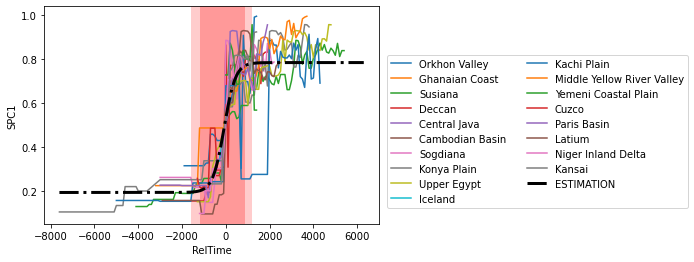

In [47]:
DF_Out = pd.DataFrame(columns=["NGA","RelTime","SPC1"])
DF_CC_Out = pd.DataFrame(columns =["NGA","RelTime","SPC1", "PolPop", "PolTerr",   "CapPop", "levels",
                         "government",  "infrastr", "writing", "texts", "money"])

for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    DF_Out = pd.concat((DF_Out, DF[["NGA", "RelTime", "SPC1"]]))
    DF_CC_Out = pd.concat((DF_CC_Out, DF[DF_CC_Out.columns]))
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
plt.savefig("SPC1_Time_Interval")
plt.show()

In [48]:
print(T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled)

-1578.23035322519 -1184.527450136463 859.4643325972228 1189.1334631953628


In [49]:
DF_Out.index=np.arange(0, DF_Out.shape[0])
DF_Out.to_csv("RelTime_TimeSeries_SPC1.csv")
DF_CC_Out.index = DF_Out.index

In [50]:
Timeframes = np.array([T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled])

In [51]:
np.savetxt("Parameters_and_Times.txt",np.concatenate((p0, Timeframes)))

In [55]:
DF_CC_Out.to_csv("RelTime_TimeSeries_CC.csv")

In [59]:
DF_CC_Out

,NGA,RelTime,SPC1,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money
0,Orkhon Valley,-1900,0.315541,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0
1,Orkhon Valley,-1800,0.315541,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0
2,Orkhon Valley,-1700,0.315541,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0
3,Orkhon Valley,-1600,0.315541,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0
4,Orkhon Valley,-1500,0.315541,4.552769,5.591893,4.007285,2.587429,0.100000,0.075000,0.200000,0.1000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
766,Kansai,1000,0.819800,7.096910,5.469822,5.176091,5.909872,0.690000,0.916667,1.000000,0.9875,4.0
767,Kansai,1100,0.746661,7.230449,4.176091,4.602060,5.083771,0.490000,0.840000,0.985714,0.9250,5.0
768,Kansai,1200,0.824980,7.397940,5.469822,5.000000,5.244956,0.710000,0.925000,0.983333,0.9875,5.0
769,Kansai,1300,0.923083,7.462398,5.469822,6.113943,6.534359,0.857143,1.000000,1.000000,1.0000,6.0
